In [1]:
from pathlib import Path
PROJECT_ROOT = Path.cwd().parents[1]
import sys
sys.path.append(str(PROJECT_ROOT))
from bahamas_lig.utils import *
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.gridspec as gridspec
import itertools

In [2]:
## Styling
sns.set_palette("viridis", n_colors=6)
sns.set_style(
    "ticks",
    {
        "axes.edgecolor": ".3",
        "xtick.color": ".3",
        "ytick.color": ".3",
        "text.color": ".3",
        "axes.facecolor": "(.98,.98,.98)",
        "axes.grid": True,
        "grid.color": ".9",
        "grid.linestyle": u"-.",
    },
)
sns.set_context("talk")

## Load GIA model weights

In [20]:
for LIS in models_df['LIS'].unique():
    print(89.4-LIS,np.round(100*np.sum(models_df[models_df['LIS']==LIS]['weight']),2))

0.0 0.0
8.0 0.01
16.0 6.82
23.0 91.32
30.0 1.41
46.0 0.4


In [21]:
91.32+6.82

98.13999999999999

In [7]:
model_dir = PROJECT_ROOT / "model_outputs/get_GIA/output_new"
inference_dir = PROJECT_ROOT / "model_outputs/"
models_df=get_model_status(inference_dir,model_dir)
models_df=models_df[models_df['Lithosphere']!=99].sort_values('esl_curve',ascending=False)


models_df['SIS']=0
idx=models_df['ice_history']=='Colleoni'
models_df.at[idx,'SIS']=70

idx=models_df['ice_history']=='ICE6G'
models_df.at[idx,'SIS']=24

idx=models_df['ice_history']=='L6G-32'
models_df.at[idx,'SIS']=32

idx=models_df['ice_history']=='L6G-47'
models_df.at[idx,'SIS']=47

idx=models_df['ice_history']=='L6G'
models_df.at[idx,'SIS']=40

idx=models_df['ice_history']=='Lambeck'
models_df.at[idx,'SIS']=54

models_df['LIS']= 132.7-2.7-16.6 - models_df["SIS"]

models_df=models_df.sort_values('SIS')

A=models_df['ice_history'].unique()
B=models_df['esl_curve'].unique()
C=models_df['Lithosphere'].unique() #ignore 48
experiments=list(itertools.product(*[A,B,C]))


/limestone/jupyter/blake/production/bahamas_lig (4th copy)/bahamas_lig/utils.py:274: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/limestone/jupyter/blake/production/bahamas_lig (4th copy)/bahamas_lig/utils.py:275: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0, w_pad=2, h_pad=-10)


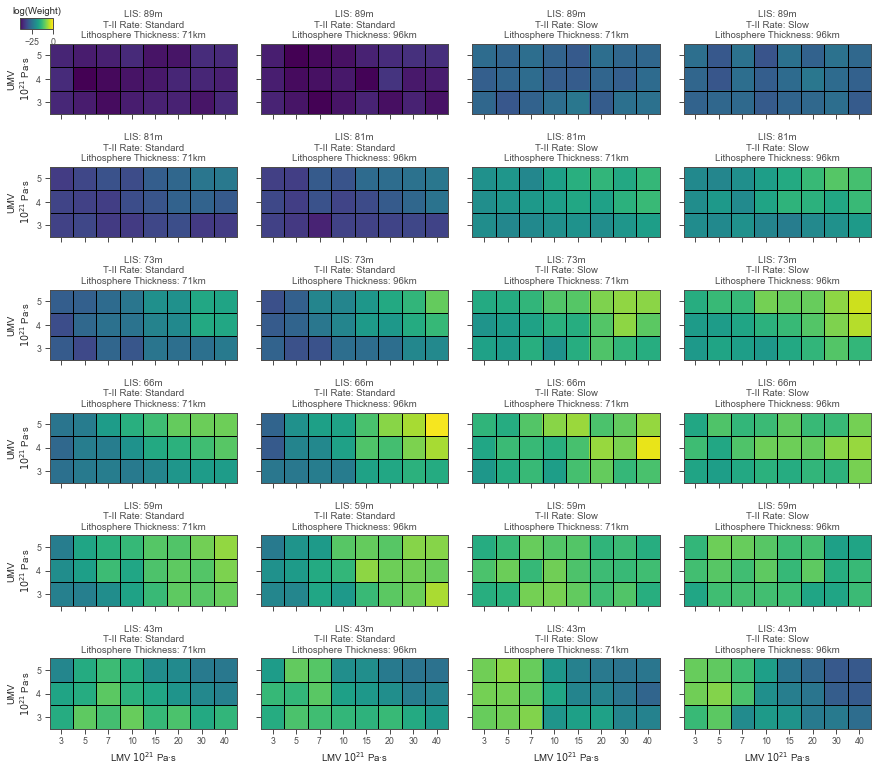

In [4]:
fig=plot_weights(models_df,experiments,'weight')
fig.savefig("LIG_weights.pdf", bbox_inches="tight", dpi=300)

**Fig. 3.**  Each square represents a single GIA model colored by its weights, which can be interpreted as the relative probability of each model to have generated the lastinterglacial sea level data (among the 576 compared GIA models). The model parameters are described by the sub-plot titles and the x and y axes, LMV = lower mantleviscosity, UMV = upper mantle viscosity, T-II = termination II or penultimate deglaciation, LIS = Laurentide ice sheet. Numbers associated with the LIS are sealevel equivalentice volume of the LIS at the penultimate glacial maximum, larger values indicate a larger ice sheet. Each row represents a unique penultimate glacial maximum ice loadinghistory, with increasingly smaller Laurentide ice sheets in the down direction. The left two columns reflect models where the deglaciation prior to the LIG starts earlier (seeMethods for more details).